<h1> <center> TReND Comp Neuro Summer School </center> </h1> 

<h2> <center> Mathematics for Machine learning  </center> </h2> 

#### Lists of Content 

- Probability distribution 

    - Discrete probability distributions
    
        - Bernoulli 
        - Binomial 
        - Negative Binomial
        - Geometric 
        - Poisson
    - Continuous probability distribution 
    
        - Uniform 
        - Exponential
        - Gaussian 
        
- Derivative of linear transformation 

    - vector/matrix 
    - Optimization 
    
- Optimization function 
    
    
- MLE and MAP Estimation : Regression model

### Probability distribution:

- A probability distribution is a statistical function that describes all the possible values and probabilities for a random variable within a given range. In this class, we are going to review known probability distributions and their mathematical properties. We are going to use python to generate various probability distributions. 

***Random Variable***:  is a real-valued function defined over a sample space. Consequently, a random variable can be used to identify numerical events that are of interest in an experiment. We commonly use uppercase letters to denote a random variable, and lowercase letters to denote the particular values that a random variable can assume.

$$P_{x}(x)=P(X =x)$$

where we denote the $X$ and $x$ as the random variable and value respectively. 


- A probability mass function (PMF) of a discrete random variable X is a function that gives the probability that X is equal to a certain value. The pmf of $X$ is define:
$$0 \leq P(X=x) \leq 1$$

The pmf is the probability of $X=x$. The summation of the probabilities over the discrete random variable $X$ is 1. 

$$ \sum_{x}P(X=x) = 1$$

The cumulative distribution function (CDF) of a random variable X is the function given by:

$$ F_{x}(x) = P(X\leq x)$$

For a discrete random variable, this is equal to the sum of the probabilities of all the outcomes in which the value of X is less than or equal to x. Represented by;

$$ F_{x}(t) = P(X\leq t) = \sum_{x\leq t}P(X=x)$$

Expectation of discrete random variable $X$ is defined as 
$$E[X] = \sum_{\forall x} xP(X=x)$$

Variance of the random variable $X$ is defined as:
\begin{eqnarray}
Var(X) = E[(X - E[X])^{2}] \\
Var(X) = E[X^{2}] - E[X]^{2}
\end{eqnarray}

The standard deviation is defined by;
$$ \sigma = \sqrt(Var(X)$$

#### Bernoulli distribution

A random variable is said to be Bernoulli distribution when it assume only two values 0 and 1 and their corresponding probabilities lies between 0 and 1. The probabiliy mass function defined as follow;

$$ P(X=x) = \begin{cases} P^{x}(1-P)^{1-x} & \text{for }   x = 0,1 \\ 0 & \text{otherwise} \end{cases}$$

$$ P(X=1) = P, P(X=0) = 1 - P$$

If $X$ is a bernoulli distribution with parameter $p$ which is denote as $X\sim Bern(p)$

In [264]:
from scipy.stats import bernoulli
x = 1
p = 0.5
bernoulli.pmf(k=x, p=p) ### calculate pmf. 

0.5

In [2]:
print("Expectation of X:",bernoulli.mean(p=p))

Expectation of X: 0.5


In [4]:
print("Variance of X:",bernoulli.var(p=p))
print("std of X:",bernoulli.std(p=p))

Variance of X: 0.25
std of X: 0.5


In [6]:
print("CDF is: ",bernoulli.cdf(k=1, p=p))

CDF is:  1.0


In [8]:
print("Random variates of bernoulli distn: ",bernoulli.rvs(p=p, size=10, random_state=1))

Random variates of bernoulli distn:  [0 1 0 0 0 0 0 0 0 1]


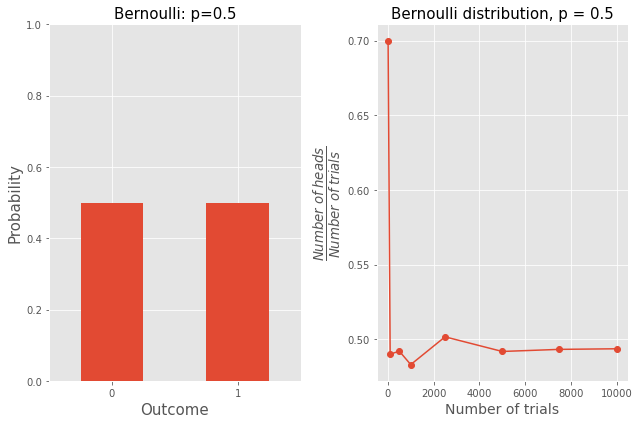

In [41]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = [0,1]
p = 0.5
bernoulli_pmf = [bernoulli.pmf(k=i,p=p) for i in x] 
sample = bernoulli.rvs(p=p, size = 10000)
num_trials = [10, 100, 500, 1000, 2500, 5000, 7500, 10000]
points = [sample[0:l].mean() for l in num_trials]

with plt.style.context("ggplot"):
    plt.figure(figsize=(9,6))
    plt.subplot(1,2,1)
    plt.bar(x, bernoulli_pmf, width = 0.5)
    plt.xlim(-0.5, 1.5)
    plt.ylim(0, 1)
    plt.title(f'Bernoulli: p={p:.2}', fontsize=15)
    plt.xlabel('Outcome', fontsize=15)
    plt.ylabel('Probability', fontsize=15)
    plt.xticks(np.arange(0, 2, 1))
    
    ####### law of large number 
    plt.subplot(1,2,2)
    plt.plot(num_trials, points, marker="o")
    plt.xlabel("Number of trials", fontsize = 14)
    plt.ylabel(r"$\frac{Number\; of \; heads}{Number\; of \; trials}$",
               fontsize= 19)
    plt.title("Bernoulli distribution, p = {}".format(p), fontsize= 15)
    plt.tight_layout()



### Binomial Probability distribution:

This is a collections of independent bernoulli distribution $X = X_{1} + X_{2} + \cdots + X_{n}$ with parameter p. Where $X$ is binomial distribution with parameters $n$ and $p$. We write as $X \sim Binom(n,p)$. The pmf for X is defined as: 

$$ P(X=x) = \begin{cases} \binom{n}{x} p^{x}(1-p)^{n-x} & \text{for } x=0,1,2,\cdots n  \\ 0 & \text{otherwise}   \end{cases}$$

The expectation of a binomial distribution is defined as: 

$$E[X] = np $$
where n is the number of trial and p is probability of occurence. 

The variance is defined as follows: 

$$ Var[X] = np(1-p)$$

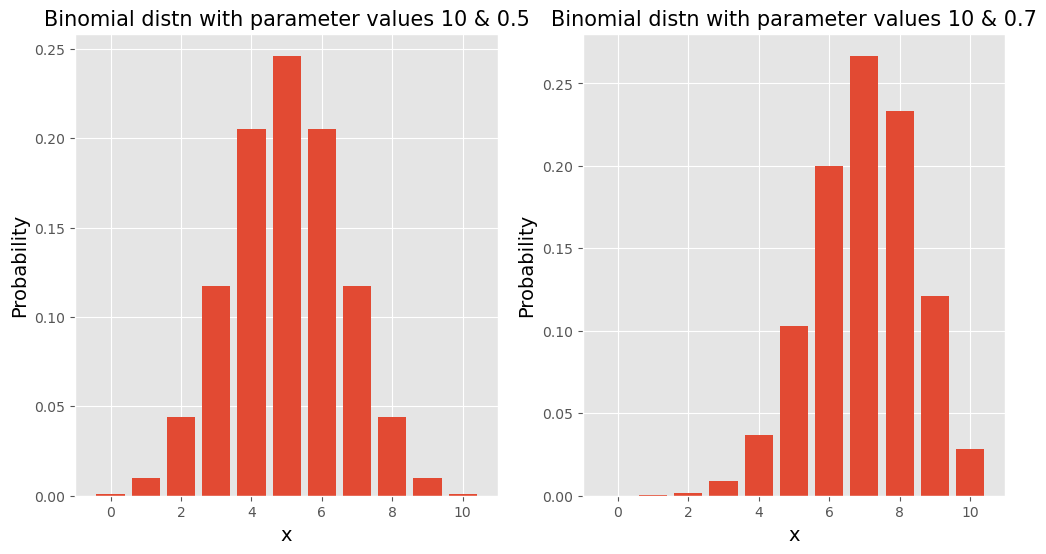

In [238]:
from scipy.stats import binom
##### 
n = 10
p = 0.5
p2 = 0.7
x = np.arange(0, n+1) ##### generate values between 0 to n 
binomial = binom.pmf(k=x,n=n, p=p) 

binomial2 = binom.pmf(k=x,n=n,p=p2)

with plt.style.context("ggplot"):   
    plt.figure(figsize=(12,6))
    
    plt.subplot(1,2,1)
    plt.bar(x, binomial)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.xlim([-1, n+1])
    plt.title(f"Binomial distn with parameter values {n} & {p}",
              fontsize= 15)
    
    #### skewness of the plot based on the parameter p 
    plt.subplot(1,2,2)
    plt.bar(x, binomial2)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.xlim([-1, n+1])
    plt.title(f"Binomial distn with parameter values {n} & {p2}",
              fontsize= 15)
    
    
    plt.show()

In [55]:
sample_binom = binom.rvs(n=20, p=0.5, size=100)
print(f"random variates for binomial distn: {sample_binom}")
from collections import Counter
print(Counter(sample_binom))

random variates for binomial distn: [13 11  9  9  7  9  8 11 11  9 10 12 11 11  8 11  9  8  9  9 10  8  9 13
  8  8  7 11 10 10  6 14 12 12 13 12  8 14 13 11  9  3 10 11 15  8  7 10
 12  9 11 13 12  7 10  6  8 12  8 10 11  8 13  7 13  7 13  9 12  9 11 12
 10  9  9  6  5 11 10  8 13 11 10  9  9  9 13  9  5  8  9  8 12 17  9 10
  6  8  8  9]
Counter({9: 21, 8: 16, 11: 14, 10: 12, 13: 10, 12: 10, 7: 6, 6: 4, 14: 2, 5: 2, 3: 1, 15: 1, 17: 1})


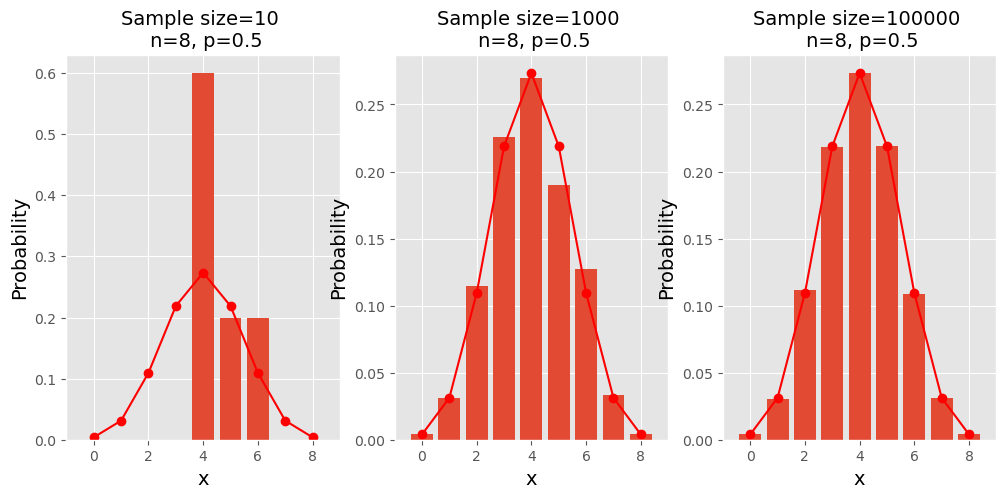

In [262]:
np.random.seed(0)
n = 8
p = 0.5
x = np.arange(9)
binomial = binom.pmf(k = x,n = n, p = p)

with plt.style.context("ggplot"):
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))

    for id, s in enumerate([10, 1000, 100000]):
        #sample = [bernoulli.rvs(p=p, size=n).sum() for i in range(s)]
        sample = binom.rvs(n=n, p=p, size=s)
        values, counts = np.unique(sample, return_counts=True)
        probs = counts / counts.sum()
        axs[id].bar(values, probs)
        axs[id].plot(x, binomial, marker='o', color='red')
        axs[id].set_title("Sample size={0} \n n={1}, p={2}".format(s, n, p),
                         fontsize=14)
        axs[id].set_xlabel('x', fontsize = 14)
        axs[id].set_ylabel('Probability', fontsize=14)
        axs[id].set_xlim([-1, 9])

    plt.show()

### Negative Binomial Distn: 

Suppose that we have a sequence of Bernoulli trials with the parameter p (so the probability of success in each trial is p), and these trials are independent. Let the discrete random variable X denote the number of failures that occur before the rth success. Then X has the following PMF:

$$ P(X=x) = \begin{cases} \binom{r + x - 1}{x} p^{r}(1-p)^{x} & \text{for } x=0,1,2,\cdots \\  0 & \text{otherwise}   \end{cases}$$

So $P(X=x)$ gives the probability of getting $x$ failures that occur before the rth success. We say that $X$ has a negative binomial distribution with parameters $r$ and $p$, and denote it by $X \sim NBin(r, p)$.
We can create a negative binomial distribution using the object nbinom in scipy. The methods of this object take the parameters $k$,$n$ and $p$ which correspond to $x$, $r$, and $p$ in Equation 14. Listing 5 plots the PMF of a negative binomial distribution with $p=0.5$ and $r=10$.

***Expectation*** is defined as: 
$$E[X] = \dfrac{r(1-p)}{p}$$

***Variance*** defined as:
$$Var[X] = \dfrac{r(1-p)}{p^{2}}$$

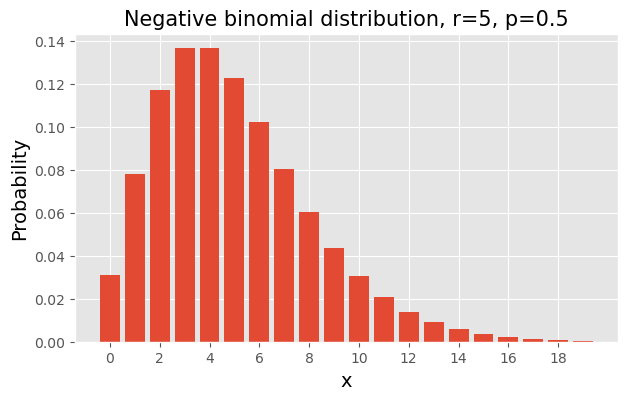

In [258]:
from scipy.stats import nbinom
r = 5
p = 0.5
x = np.arange(0, 20)
nbinomial = nbinom.pmf(k=x,n=r, p=p)
with plt.style.context("ggplot"):    
    plt.figure(figsize=(7,4))
    plt.bar(x, nbinomial)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.title(f"Negative binomial distribution, r={r}, p={p}",fontsize= 15)
    plt.xticks(np.arange(0, 20, 2))
    plt.show()

In the figure, we show how a negative binomial distribution results from a sequence of Bernoulli random variables. We assume that r=5. We create a 2-d array of Bernoulli random variates with the shape (sample_size, num_trials). Each row in this array represents a sequence of Bernoulli trials. The number of these sequences is determined by sample_size and the number of trials in each sequence is set by num_trials. We calculate the fraction of sequences in which the last trial is a success and the total number of successes is r. This fraction gives the probability of getting num_trials-r failures. We plot these probabilities for different values of sample_size (Figure 8). As sample_size increases, the shape of the bar chart gets closer to the PMF of a negative binomial distribution (red curve).

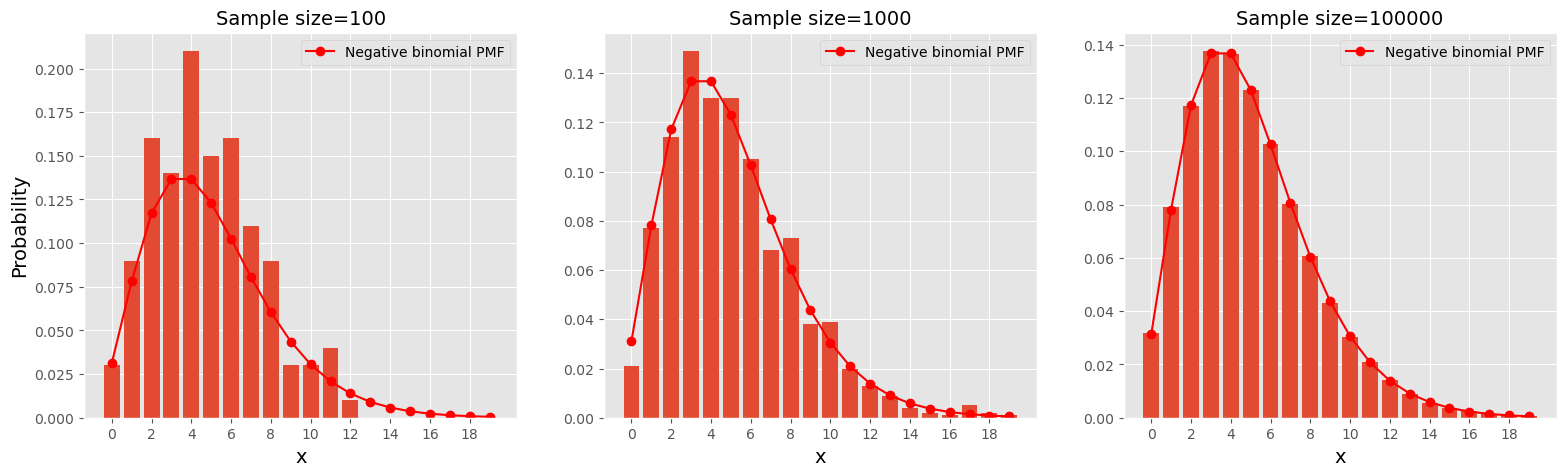

In [265]:
np.random.seed(0)
r = 5
p= 0.5
sample_size = [100, 1000, 100000]
x_range = range(20)
nbinomial = nbinom.pmf(k=x_range,n=r, p=p)
with plt.style.context("ggplot"):
    fig, axs = plt.subplots(1, 3, figsize=(19, 5))
    for i in range(3):
        probs = []
        for x in x_range:
            num_trials = r + x
            sample = bernoulli.rvs(p=p, size=num_trials*sample_size[i]). \
                     reshape(sample_size[i], num_trials)
            filtered_sample = sample[(sample[:,-1] == 1) & (sample.sum(axis = 1) == r)]
            prob = len(filtered_sample) / sample_size[i]
            probs.append(prob)
        axs[i].bar(x_range, probs)
        axs[i].set_xticks(np.arange(0, 20, 2))
        axs[i].set_title("Sample size="+str(sample_size[i]), fontsize=14)
        axs[i].set_xlabel("x", fontsize=14)
        axs[i].plot(x_range, nbinomial, marker="o", color="red",
                    label="Negative binomial PMF")
        axs[i].legend(loc="best")
    axs[0].set_ylabel("Probability", fontsize=14)
    plt.show()

### Geometric Distribution: 
We define the geometric distribution based on the number of trials needed to get the first success. If the success occurs at xth trial, then it means that we had x-1 failures before that, so the probability of these events is p(1-p)ˣ⁻¹. In that case, the PMF of the distribution will be defined as:

$$ P(X=x) = \begin{cases} p(1-p)^{x} & \text{for } x=0,1,2,3,\cdots \\ 0 & \text{otherwise}   \end{cases}$$

***Expectation*** defined as:

$$ E[X] = \dfrac{1-p}{p}$$

***Variance*** defined as:
$$ Var[X] = \dfrac{1-p}{p^{2}}$$

This distn is also known as memoryless.[Read](https://en.wikipedia.org/wiki/Memorylessness) 

Here the number of failures is x-1. In scipy we can generate a geometric distribution using the object geom. ***geom.pmf(k=x,p=p)***

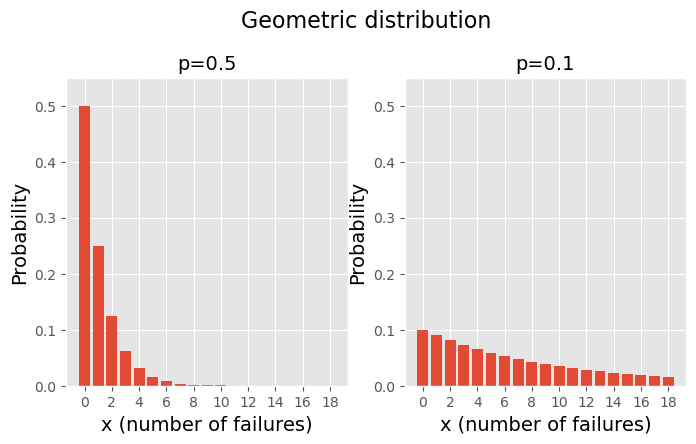

In [255]:
from scipy.stats import geom
p_list = [0.5, 0.1]
x = np.arange(1, 20)

with plt.style.context("ggplot"):
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    for i, p in enumerate(p_list):
        geometric = geom.pmf(k=x,p=p)
        with plt.style.context("ggplot"):
            axs[i].bar(x-1, geometric)
            axs[i].set_xlabel("x (number of failures)", fontsize=14)
            axs[i].set_ylabel("Probability", fontsize=14)
            axs[i].set_title("p={0}".format(p),
            fontsize= 14)
            axs[i].set_ylim([0, 0.55])
            axs[i].set_xticks(np.arange(0, 20, 2))
    plt.suptitle("Geometric distribution", fontsize=16, y=1.05)
    plt.show()

In [81]:
sample = geom.rvs(p=0.3, size=20)

In [83]:
print("random variates: ",sample)

random variates:  [ 2  2  4 11  2  3  1  2  9  6  5  4  3  4  1  4  1  1  2  1]


### Poisson Distribution: 

A discrete random variable $X$ has the Poisson distribution with parameter $\lambda$ ($\lambda$ >0) if the PMF of $X$ is as follows:

$$ P(X=x) = \begin{cases} \dfrac{\lambda^{x} e^{-\lambda}}{x!} & \text{for } x = 0,1,2,\cdots \\ 0 & \text{otherwise}  \end{cases}$$

We also denote it by $X \sim Pois(\lambda)$. The Poisson distribution is a limiting case of the binomial distribution when the number of trials $n$ tends to infinity while the product $np=\lambda$ (which is the mean of distribution) remains constant. Please note that $p$ is very small, but it is not zero (if it were zero, the PMF would be zero everywhere).

***Expectation*** is defined as:

$$E[X] = \lambda$$

***Variance***  is defined as:
$$Var[X] = \lambda$$

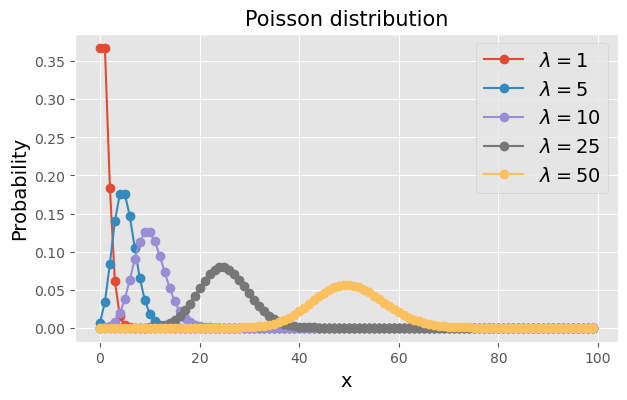

In [251]:
from scipy.stats import poisson
lambda_list = [1, 5, 10, 25, 50]
x = np.arange(0, 100)
with plt.style.context("ggplot"):    
    plt.figure(figsize=(7, 4))
    for lam in lambda_list:
        poisson_dist = poisson.pmf(x, lam)
        plt.plot(x, poisson_dist, marker = 'o',
                 label = r"$\lambda=$" + str(lam))
    plt.xlabel('x', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    #plt.xlim([-1, 9])
    plt.title("Poisson distribution", fontsize= 15)
    plt.legend(loc='best', fontsize= 14)
    plt.show()

It is important to note that we should have the following conditions to be able to apply the Poisson distribution to a system:

- The events occur independently.
- Two events cannot occur at exactly the same time. More precisely, the probability of two or more occurrences in a small interval must be negligible in comparison with the probability of one occurrence in that interval.
- The rate of occurrence, $r$, is constant, and the rate does not change based on time. So, the probability of exactly one event in a sufficiently short interval of length $h=\frac{t}{n}$ (where n is a large number) is approximately $p=\frac{\lambda}{n}=\frac{rt}{n}=rh$ (this interval (h) should be short enough to make sure that more than one event cannot occur in that).

## Continuous random variables
If $X$ is a continuous random variable, the probability that $X$ takes a value in the interval $[a, b]$ can be written as:

$$P(a\leq x \leq b) = \int_{a}^{b} f_{X}(x) \,dx $$

where $f_{X}(x) $ is called the probability density function (PDF) of $X$. We know that:

$$P(-\infty \leq x \leq \infty) = 1 $$

So, the integral of a PDF over the entire space must be equal to 1

$$\int_{-\infty}^{\infty} f_{X}(x) \,dx = 1$$ 

$$P(X=a) = \int_{a}^{a} f_{X}(x) \,dx = 0$$ 

#### Expectation and Variance of Continuous random Variable:

The expectation is defined as: 
$$E[X] = \int_{-\infty}^{\infty} xf_{X}(x) \,dx$$

Variance defined as: 

$$ Var[X] = \int_{-\infty}^{\infty} (x - E[X])^{2}f_{X}(x) \,dx = \int_{-\infty}^{\infty} x^{2}f_{X}(x) \,dx - E[X]^{2}$$

### Continuous Uniform Distribution:

Let a and b be two real numbers and $a \le b$. Let $X$ be a continuous random variable that takes the values in the interval $[a, b]$. If for every subinterval of $[a, b]$, the probability that X belongs to that subinterval is proportional to the length of that subinterval then we say that X has a uniform distribution on the interval $[a, b]$. We also write it as $X \sim U(a, b)$. The PDF of $X$ is defined : 

$$f_{X}(x) = \begin{cases} \dfrac{1}{b-a} & \text{for }  a \leq x \leq b \\ 0 & \text{otherwise} \end{cases}$$

***Expectation***  defined as:

$$ E[X] = \dfrac{a + b}{2}$$

***Variance*** defined as:

$$ Var[X] = \dfrac{(b - a)^{2}}{12}$$

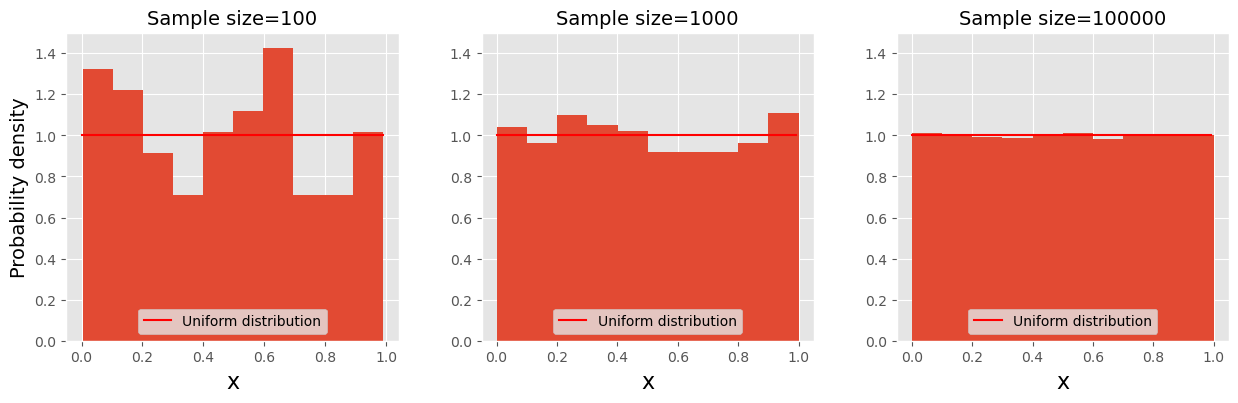

In [250]:
from scipy.stats import uniform
np.random.seed(0)
with plt.style.context("ggplot"):
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    plt.subplots_adjust(wspace=0.25)
    x = np.arange(0, 1, 0.01)
    unif_dist = uniform.pdf(x)
    for i, n in enumerate([100, 1000, 100000]):
        sample = uniform.rvs(size=n)
        axs[i].hist(sample, density=True)
        axs[i].set_xlabel('x', fontsize=16)
        axs[i].plot(x, unif_dist, color='red',
                    label="Uniform distribution")
        axs[i].set_ylim([0, 1.5])
        axs[i].set_title("Sample size="+str(n), fontsize=14)
        axs[i].legend(loc="lower center")
    axs[0].set_ylabel('Probability density', fontsize=14)
    plt.show()

#### Exponential Distn


A random variable is said to follow exponential distribution with a parameter $\lambda$ where $\lambda > 0$. The distribution is defined as: 

$$f_{X}(x) = \begin{cases} \lambda e^{\lambda x} & \text{for }  \lambda > 0 \\ 0 & \text{otherwise} \end{cases}$$

Written as $X \sim exp(\lambda)$. The exponential distribution has a single parameter $\lambda$ which represents the event rate. An exponential random variable with parameter λ represents the waiting time until the first occurrence of a Poisson event (an event in a Poisson process) with the average rate of $\lambda$. The events in the poisson process occur independently. 

##### Expectation of Exponential Distn: 

The expectation is defined as: 
$$
E[X] = \int_{0}^{\infty} xf_{X}(x) dx = \dfrac{1}{\lambda}
$$

***Exercise***: derive the expectation by hand based on the definition. 

##### Variance of Exponential Distn: 

The expectation is defined as: 
$$
Var[X] = E[X^{2}] - E[X]^{2} = \dfrac{1}{\lambda^{2}}
$$

***Exercise***: Deduce the variance using the definition of variance. 

Please note that $X$ and $E[X]$ both have the same unit. Since X represents the waiting time for a Poisson event, $E[X]$ means the average waiting time of one event.




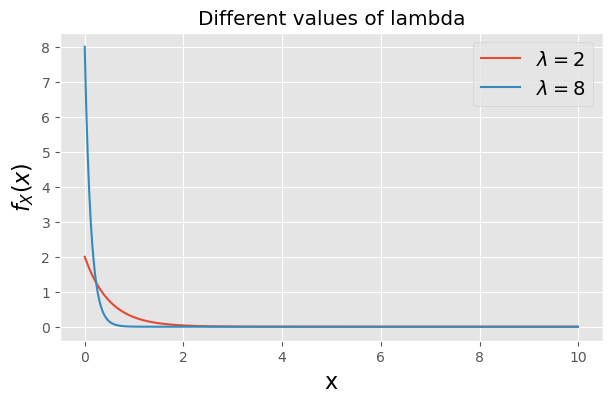

In [249]:
###### Plot the exponent distribution with different values of the parameter lambada. 
from scipy.stats import expon
x = np.arange(0, 10, 0.01)
lam1 = 2
lam2 = 8
####### Ex: Play with different values of lambda.  
with plt.style.context("ggplot"):    
    plt.figure(figsize=(7, 4))
    plt.title("Different values of lambda")
    exp_dist1= expon.pdf(x=x, scale=1/lam1)
    exp_dist2 = expon.pdf(x=x, scale=1/lam2)
    plt.plot(x, exp_dist1, label=r'$\lambda=$'+str(lam1))
    plt.plot(x, exp_dist2, label=r'$\lambda=$'+str(lam2))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('$f_X(x)$', fontsize=16)
    plt.legend(loc='best', fontsize= 14)

    plt.show()

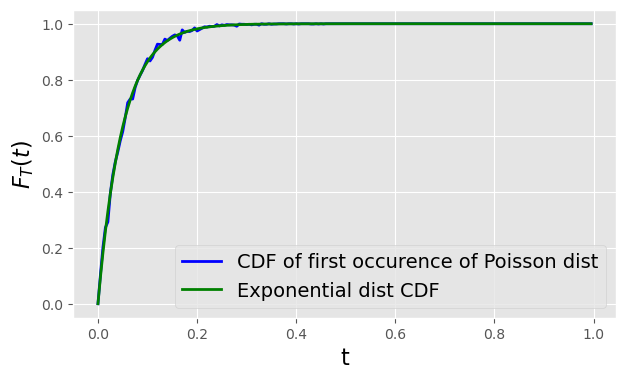

In [247]:
####### cumulative distribution between poisson and exponential distn. 
from scipy.stats import poisson
np.random.seed(0)
rate = 20
cdf_list = []
t_range = np.arange(0, 1, 0.005)


for t in t_range:
    lam = rate*t
    rvs = poisson.rvs(mu=lam, size = 1000)
    cdf_list.append((rvs > 0).mean())
    
with plt.style.context("ggplot"):
    plt.figure(figsize=(7, 4))
    plt.plot(t_range, cdf_list, linewidth=2, color='blue',
             label='CDF of first occurence of Poisson dist')
    exp_dist_cdf= expon.cdf(x=t_range, scale=1/rate)
    plt.plot(t_range, exp_dist_cdf, color='green',linewidth=2,
             label='Exponential dist CDF')
    plt.xlabel('t', fontsize=16)
    plt.ylabel('$F_T(t)$', fontsize=16)
    plt.legend(loc='best', fontsize= 14)

    plt.show()

#### Gaussian Probability distribution:

- A random variable is said to follow a gaussian distribution $X \sim N(\mu,\sigma)$ where $\mu$ and $\sigma$ are the parameters. Then we define $X$ as follows:

\begin{eqnarray}
f_{X}(x) = \dfrac{1}{\sigma\sqrt{2\pi}} \exp{\left(\frac{1}{2 \sigma^{2}} (x - \mu)^{2} \right)} && \text{for} && -\infty < x < \infty
\end{eqnarray}

##### Expectation: 

The expectation defined as $$ E[X] = \mu$$

##### Variance:

The varinace is defined as $$ Var[X] = \sigma^{2}$$

Hence the parameters $\mu$ and $\sigma^{2}$ are the mean and variance of $X$ (which means that $\sigma$ is the standard deviation of $X$ ). This is an important property of normal distribution. The other distributions that we have seen so far are somehow related to a process or occurrence of some events. In those distributions, the mean and variance of the distribution depend on the distribution parameters, but they cannot change independently. For example, in the binomial distribution with parameters $n$ and $p$, the mean, $np$, is determined by these parameters. However, we only have one choice for the variance which is $np(1-p)$. The normal distribution is the only distribution that allows us to choose the mean and variance of the distribution as the parameters of the distribution. In addition, we can choose them independently, so they do not depend on each other. This property makes the normal distribution more flexible than any other distribution.

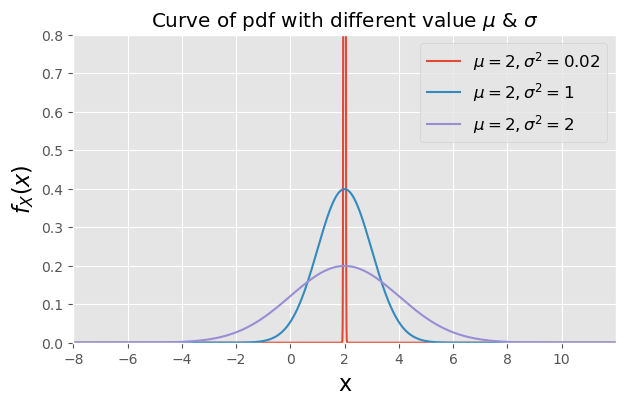

In [272]:
#### generate various representation of mu and sigma. 
from scipy.stats import norm 
x = np.arange(-10, 15, 0.01)
mu = 2
sigma1 = 0.02
sigma2 = 1
sigma3 = 2
y1 = norm.pdf(x, loc = mu, scale = sigma1)
y2 = norm.pdf(x, loc = mu, scale = sigma2)
y3 = norm.pdf(x, loc = mu, scale = sigma3)
with plt.style.context("ggplot"):
    
    plt.figure(figsize=(7, 4))

    plt.plot(x, y1, label='$\mu={}, \sigma^2={}$'.format(mu, sigma1))
    plt.plot(x, y2, label='$\mu={}, \sigma^2={}$'.format(mu, sigma2))
    plt.plot(x, y3, label='$\mu={}, \sigma^2={}$'.format(mu, sigma3))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('$f_X(x)$', fontsize=16)
    plt.title("Curve of pdf with different value $\mu$ & $\sigma$")
    plt.xlim([-8, 12])
    plt.ylim([0, 0.8])
    plt.xticks(np.arange(-8, 12, 2))    
    plt.legend(loc='best', fontsize=12)

    plt.show()

The variance (or standard deviation) shows how far away from the mean the values tend to fall. It represents the typical distance between the observations and the average. Note that the larger the variance is, the wider (and shorter) the PDF is. As the variance tends to zero, the PDF tends to a Dirac delta function which is zero everywhere except at $x = \mu$:

$$ \lim_{\sigma \to 0} f_{X}(x) = \delta{x}(x-\mu)$$

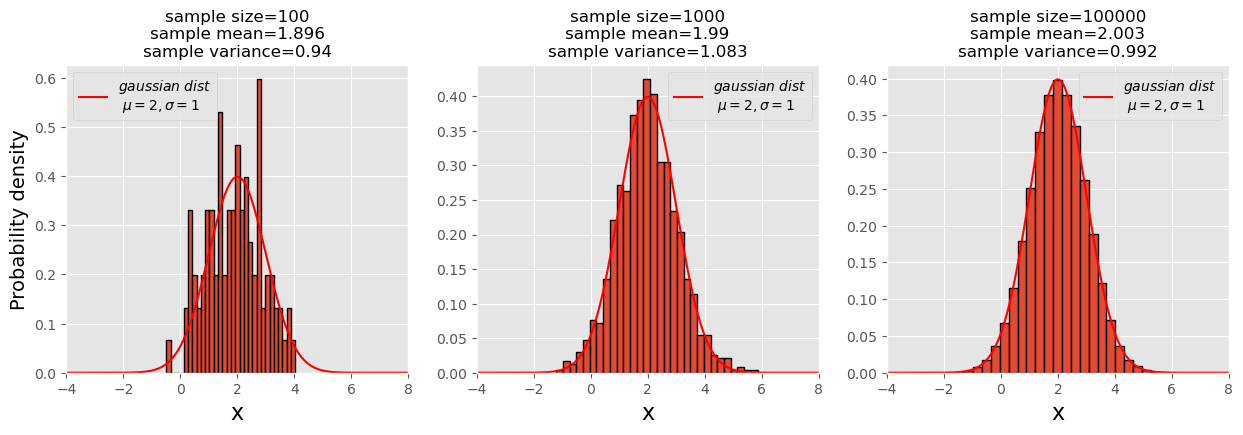

In [275]:
np.random.seed(100)

with plt.style.context("ggplot"):    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    plt.subplots_adjust(wspace=0.2)
    x = np.arange(-10, 15, 0.01)
    mu = 2
    sigma = 1
    normal_dist = norm.pdf(x, loc = mu, scale = sigma)
    for i, n in enumerate([100, 1000, 100000]):
        sample = norm.rvs(loc = mu, scale = sigma, size=n)
        sample_mean = np.round(sample.mean(), 3)
        sample_var = np.round(sample.var(), 3)
        axs[i].hist(sample, density=True, bins = 30,
                    edgecolor='black', linewidth=1)
        axs[i].set_xlabel('x', fontsize=16)
        axs[i].plot(x, normal_dist, color='red',
                    label="$gaussian \; dist$\n $\mu=2, \sigma=1$")
        axs[i].set_xlim([-4, 8])
        axs[i].set_title("sample size={}\nsample mean={}\nsample variance={}".\
                         format(n, sample_mean, sample_var), fontsize=12)
        axs[i].legend(loc="best")
    axs[0].set_ylabel('Probability density', fontsize=14)
    plt.show()

***Exercise*** 

- Play with different values of $\mu$ and $\sigma$ from the previous figure. 

##### Standard gaussian distribution 

The normal distribution with $\mu=0$ and $\sigma^{2}$=1 is called the standard normal distribution. The PDF of the standard normal distribution is usually denoted by the symbol $\phi$. 

\begin{eqnarray}
\phi(x) = \dfrac{1}{\sqrt{2\pi}}\exp{ \left(\frac{x}{2}\right)} && \text{for} && -\infty < x < \infty
\end{eqnarray}

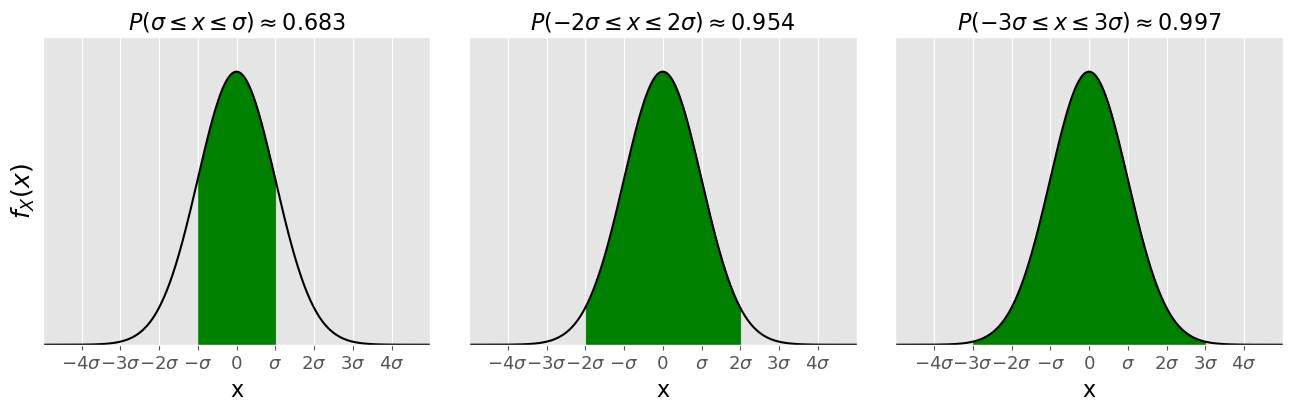

In [277]:
##### plot standard gaussian distribution. 
with plt.style.context("ggplot"):    
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))

    plt.subplots_adjust(wspace=0.1)
    x = np.arange(-10, 15, 0.01)
    mu = 0
    sigma = 1
    normal_dist = norm.pdf(x, loc = mu, scale = sigma)
    for i in range(3):
        axs[i].plot(x, normal_dist, color='black')
        xs = (i+1) * sigma
        val = norm.cdf(xs) - norm.cdf(-xs)
        axs[i].fill_between(x, normal_dist, 0,
            where = (x >= -xs) & (x <= xs), color = 'green')
        axs[i].set_xlim([-5, 5])
        axs[i].set_ylim([0, 0.45])
        if xs != 1:
            axs[i].set_title(r"$P({0}\sigma \leq x \leq {1}\sigma) \approx {2}$".\
                    format(-xs, xs, np.round(val, 3)), fontsize=16)
        else:
            axs[i].set_title(r"$P(\sigma \leq x \leq \sigma) \approx {0}$".\
                    format(np.round(val, 3)), fontsize=16)
        axs[i].set_xlabel('x', fontsize=16)
        axs[i].set_xticks(np.arange(-4*sigma, 4*sigma+1, sigma))
        fig.canvas.draw()
        labels = [item.get_text() for item in axs[i].get_xticklabels()]
        new_labels= [(item + r"$\sigma$").replace('1', '').replace('-1', '') \
                     if item !='0' else item for item in labels]
        axs[i].set_xticklabels(new_labels, fontsize = 13)
        axs[i].set_yticks([])
    axs[0].set_ylabel('$f_X(x)$', fontsize=18)
    plt.show()

### Vector Calculus:

- In the field of machine learning, our goal is optimize the objective function with respect to a set of desired model parameters that control how well a model explains the data. Searching for good parameters can be view as an optimizatio probelem where this problem is solved using gradient information. In this part of the lesson we are going define a function $f$ which takes an input $x$ and generate an output $y$ where both elements are real-valued.

\begin{eqnarray}
f : \mathbb{R}^{D} \to \mathbb{R} \\
   x \to f(x) \\
   x \to x_{1}^{2} + x_{2}^{2}
\end{eqnarray}

We will compute the gradients of functions which facilitate learning of machine learning models since the gradient points in the direction of steepest ascent therefore vector is one key tools required in machine learning in context of our class we assume that $f$ is always differentiable. For other assumptions are muted for now such as continuity and differentiability.   

***Scalar differentiation***: $f : \mathbb{R} \to \mathbb{R}$ where $x \in \mathbb{R}$ and $y \in \mathbb{R}$.

\begin{eqnarray}
\dfrac{df}{dx} = \lim_{h\to 0} \dfrac{f(x+h) - f(x)}{h}
\end{eqnarray}
where $h>0$. $f$ is the derivative at $x$ defined above as the limit of $h\to 0$

***Examples: let's solve it together*** 

- $f(x) = sin(x)$
- $f(x) = \log(x)$
- $f(x) = x^{n}$


In [ ]:
##### code solution here: Exercise 
import numpy as np 
x = 4
n = 7

def f1(x):
    """ Derivative of sin(x)"""
    
    return ....... #### compute the answer

def f2(x):
    """ Derivative of log(x)"""
    return ....... #### compute the answer

def f3(x,n):
    """ Derivative of x^{n}"""
    return ...... ##### compute the answer



##### Derivative Rules:

- Sum Rule:
$$
\left(f(x) + g(x)\right)^{'} = f^{'}(x) + g^{'}(x) = \dfrac{df(x)}{dx} + \dfrac{dg(x)}{dx}
$$

- Product Rule:

$$
\left(f(x)g(x)\right)^{'} = f^{'}(x)g(x) + f(x)g^{'}(x) = \dfrac{df(x)}{dx}g(x) + f(x) \dfrac{dg(x)}{dx}
$$

- Chain Rule:

$$
(g \circ f)^{'}(x) = g^{'}(f(x))f^{'}(x) = \dfrac{dg(f(x))}{df} \dfrac{df(x)}{dx}
$$

- Quotient Rule:

$$
\left(\dfrac{f(x)}{g(x)}\right)^{'} = \dfrac{f(x)^{'}g(x) - f(x)g(x)^{'}}{(g(x))^{2}} = \dfrac{\frac{df}{dx}g(x) - f(x) \frac{dg}{dx}}{(g(x))^{2}}
$$

***Examples***:

- Which rule would you use? 

- $g(z) = 6z + 3$ and $z = f(x) = -2x + 5$

- $g(z) = tanh(z)$ and   $z = f(x) = x^{n}$ ***

#### Scalar Differentiation:

let define a function as $f : \mathbb{R} \to \mathbb{R}^{N}$

$$
f(x) = \begin{bmatrix} f_{1}(x) \\ \vdots \\ f_{N}(x) \end{bmatrix} \in \mathbb{R}^{N}, x\in \mathbb{R}
$$

where $f_{N}$ are different functions. We compute the derivatives of each function 

$$
\dfrac{df}{dx} = \begin{bmatrix} \frac{df_{1}}{dx} \\ \vdots \\ \frac{df_{N}}{dx}  \end{bmatrix} \in \mathbb{R}^{N \times 1}
$$

This is the derivative of a column vector with respect to a scalar input is a column vector. 

***Example: Solve it***
$f : \mathbb{R} \to \mathbb{R}^{2}$
$$
f(x) = \begin{bmatrix} f_{1}(x) \\ f_{2}(2) \end{bmatrix} = \begin{bmatrix} x^{2} \\ \sin(x) \end{bmatrix}
$$

#### Partial/Multivariate Derivative: $f : \mathbb{R}^{N} \to \mathbb{R}$

***Definition***: Given a function $f : \mathbb{R}^{N} \to \mathbb{R}$, $x \to f(x)$, $x \in \mathbb{R}^{N}$ of $N$ variables $x_{1},x_{2},\cdots,x_{n}$ we define the partial as 

\begin{eqnarray}
\dfrac{\partial f}{\partial x_{1}} = \lim_{h \to 0} \dfrac{f(x_{1} + h,x_{2},\cdots,x_{n}) - f(x)}{h} \\
\dfrac{\partial f}{\partial x_{2}} = \lim_{h \to 0} \dfrac{f(x_{1},x_{2} + h,\cdots,x_{n}) - f(x)}{h} \\
 \vdots \\
\dfrac{\partial f}{\partial x_{n}} = \lim_{h \to 0} \dfrac{f(x_{1},x_{2},\cdots,x_{n} + h) - f(x)}{h}
\end{eqnarray}

and collect them in the row vector 

\begin{eqnarray}
\nabla_{x}f = \left[\dfrac{\partial f}{\partial x_{1}}  \dfrac{\partial f}{\partial x_{2}}  \dfrac{\partial f}{\partial x_{3}}  \cdots \dfrac{\partial f}{\partial x_{n}}\right] \in \mathbb{R}^{1 \times N}
\end{eqnarray}

This is row vector.


###### Example 1: 
$f: \mathbb{R}^{N} \to \mathbb{R}$ 
\begin{eqnarray}
f(x_{1},x_{2}) = x_{1}^{2}x_{2} + x_{1}x_{2}^{3}
\end{eqnarray}

###### Example 2: 

\begin{eqnarray}
f(x_{1},x_{2}) = (x_{1} + 2x_{2}^{3})^{2} 
\end{eqnarray}

In [ ]:
#### implement the solution: 
def funct_partial1(x1=3,x2=5):
    return [....,....]

def funct_partial2(x1=7,x2=8):
    return [....,....]

##### Exercise: Multivariate Chain Rule: 

Consider the function: 

$$
L(e) = \frac{1}{2}||e||^{2} = \frac{1}{2}e^{T}e \\
e = y - Ax, x\in \mathbb{R}^{N}, A \in \mathbb{R}^{M \times N}, e,y \in \mathbb{R}^{M}
$$

- Compute the gradient $\frac{dL}{dx}$

- What is the dimension/size of $\frac{dL}{dx}$

#### Vector Field Differentiation: 

Given a $f$ as a function defined as: $f: \mathbb{R}^{N} \to \mathbb{R}^{M}$

$$ y = f(x) \in \mathbb{R}^{M}, x \in \mathbb{R}^{N}$$

\begin{eqnarray}
\begin{bmatrix} y_{1} \\ \vdots \\ y_{M}\end{bmatrix} = \begin{bmatrix}f_{1}(x) \\ \vdots \\ f_{M}(x)\end{bmatrix} = \begin{bmatrix}f_{1}(x_{1},\cdots,x_{N}) \\ \vdots \\ f_{M}(x_{1},\cdots,x_{N})\end{bmatrix}
\end{eqnarray}

- Jacobian matrix (collections of all partial derivatives)

\begin{eqnarray}
\begin{bmatrix} \frac{dy_{1}}{dx} \\ \vdots \\ \frac{dy_{M}}{dx}\end{bmatrix} = \begin{bmatrix} \frac{\partial f_{1}}{\partial x_{1}} \cdots \frac{f_{1}}{\partial x_{N}} \\
\vdots  \cdots \vdots \\
\frac{\partial f_{M}}{\partial x_{1}} \cdots \frac{f_{M}}{\partial x_{N}}
\end{bmatrix} \in \mathbb{R}^{M \times N}
\end{eqnarray}


***Dimensionality of the Gradient***:

In general: A function $f : \mathbb{R}^{N} \to \mathbb{R}^{M}$ has a gradient that is an $M \times N$ matrix with 

$$
\dfrac{df}{dx} \in \mathbb{R}^{M \times N}, df[m,n] = \dfrac{\partial f_{m}}{\partial x_{n}}
$$

***NB***: Gradient dimension : target dimension $\times$ input dimensions

***Exercise solve with your neighbor***:

$$
f(x) = Ax,  f(x) \in \mathbb{R}^{M} , A \in \mathbb{R}^{M \times N}, x \in \mathbb{R}^{N}
$$

\begin{eqnarray}
\begin{bmatrix} y_{1} \\ \vdots \\ y_{M}\end{bmatrix} = \begin{bmatrix}f_{1}(x) \\ \vdots \\ f_{M}(x)\end{bmatrix} = \begin{bmatrix}A_{11}x_{1} + A_{12}x_{2} + \cdots + A_{1N}x_{N}\\ \vdots \\ A_{M1}x_{1} + A_{M2}x_{2} + \cdots + A_{MN}x_{N}\end{bmatrix}
\end{eqnarray}

- Compute the gradient $\frac{df}{dx}$ and dimension of the derivative. 


***Exercise solve with your neighbor***:

Given $f : \mathbb{R}^{2} \to \mathbb{R}$, $x : \mathbb{R} \to \mathbb{R}^{2}$ 

$$
f(x) = f(x_{1},x_{2}) = x_{1}^{2} + 2x_{2}
$$

$$
x(t) = \begin{bmatrix} x_{1}(t) \\ x_{2}(t) \end{bmatrix} = \begin{bmatrix} \sin(t) \\ cos(t) \end{bmatrix}
$$

- What are the dimensions of $\dfrac{df}{dx}$ and $\dfrac{dx}{dt}$?
- Compute derivative and the dimension of $\dfrac{df}{dt}$. 

### Continuous Optimization. 

- The goal of optimization problem is search the set of variables that achieves the best possible value of the objective, among all those values that satisfy certain conditions. We have two main branches of continuous optimization: 

    - Uncontrained optimization
    - Contrained optimization 

In the context of this class, we assume the objective function is differentiabe, hence we can find the gradient of each location in the space to help us find the optimum value. Most machine learning objective functions are intended to be minimized, that is, the best value in the minimum value. Intuitively speaking, we are finding the best value is like finding the valley of the objective function, and the gradients point us uphill. The idea is to move downhill (opposite to the gradient) and hope to find the deepest point. In constrained optimization, we need to introduce other concepts to manage the constraints. 

Let's consider the plot below compute the global minimum value of the function 

$$l(x) = 5x^{2} + 17x + 3$$

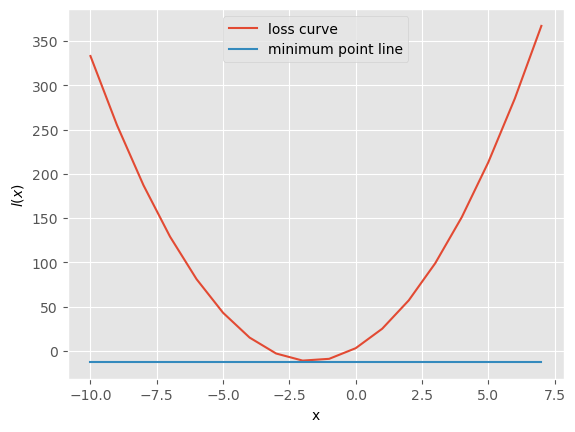

In [39]:
##### illustration of global minimum: 
def l(x):
    return 5*x**2 + 17*x + 3

#### generate the values required: 
x = np.arange(-10,8,1)
lx = [l(i) for i in x]
ll = [-12.5 for _ in range(len(x))]

##### visualize the values: 
with plt.style.context("ggplot"):
    plt.plot(x,lx,label="loss curve")
    plt.plot(x,ll,label="minimum point line")
    plt.xlabel("x")
    plt.ylabel(r"$l(x)$")
    plt.legend(loc="best")
    plt.show()

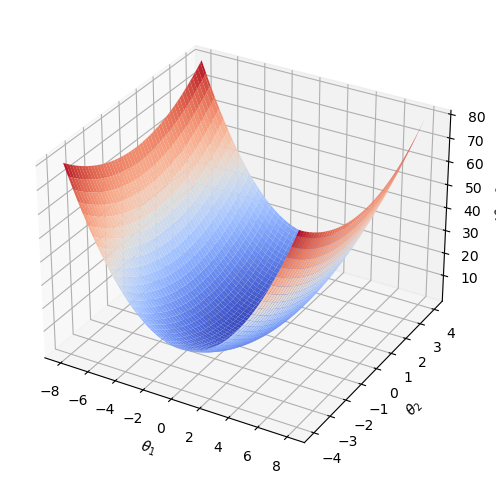

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(projection='3d')
# Data
X = np.linspace(-8, 8, 100)
Y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot the 3d surface
surface = ax.plot_surface(X, Y, Z,
                          cmap=cm.coolwarm,
                          rstride = 2,
                          cstride = 2)

# Set some labels
ax.set_xlabel(r'$\theta_{1}$')
ax.set_ylabel(r"$\theta_{2}$")
ax.set_zlabel(r'J$\theta_{1},\theta_{2}$')

plt.show()

### Uncontrained optimization: 

- Let's look at solving the unconstrained optimization problem:

\begin{eqnarray}
\min_{\theta} && f(\theta)
\end{eqnarray}

where $f : \mathbb{R}^{D} \to \mathbb{R}$ is an objective function that captures the machine learning problem at hand. We assume that our function $f$ is differentiable and we are unable to analytically find a solution in closed form. 

- Gradient descent is a first-order optimization algorithm. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at current point. This algorithm tends to exploits the fact that $f(\theta_{0})$ decreases fastest if one moves from $\theta_{0}$ in the direction of the negative gradient $-((\nabla f)(\theta_{0})^{T}$ of $f$ at $\theta_{0}$. Which define as follows:

\begin{eqnarray}
\theta_{1} = \theta_{0} - \alpha((\nabla f)(\theta_{0})^{T}
\end{eqnarray}

for a small step-size $\alpha \ge 0$ then $f(\theta_{1} \le f(\theta_{0})$. We use transpose in this case because of the dimensions. From we can define a gradient descent algorithm: if we want to find a local optimum $f(\theta_{*})$ of a function $f: \mathbb{R}^{D} \to \mathbb{R}, \theta \to f(\theta)$, we start with an intial guess $\theta_{0}$ of the parameters we desire to optimize and then iterate according to 

\begin{eqnarray}
\theta_{i+1} = \theta_{i} - \alpha ((\nabla f)(\theta_{i})^{T}
\end{eqnarray}

For suitable step-size $\alpha$ the sequence $f(\theta_{0}) \ge f(\theta_{1}) \ge \cdots$ converges to a local minimum. 

***NB***: Gradient descent can be relatively slow close to the minimum: Its asymptotic rate of convergence is inferior to many other methods. Choosing a good step-size is important in gradient descent. If the step-size is too small, gradient descent can be slow. If the step-size is too large, gradient descent can overshoot, fail to converge, or even diverge. 

- Gradient descent with Momentum: is an optimization algorithm that introduces an additional term to remember what happened in the previous iteration. This memory dampens oscillations and smoothes out the gradient updates.The idea is to have a gradient update with memory to implement a moving average. The momentum-based method remembers the update $\nabla \theta_{i}$ at each iteration $i$ and determines the next update as a linear combination of the current and previous gradients.

\begin{eqnarray}
\theta_{i + 1} = \theta_{i} - \alpha((\nabla f) (\theta_{i}))^{T} + \gamma \Delta \theta_{i} \\
\Delta \theta_{i} = \theta_{i} - \theta_{i-1} = -\alpha_{i-1}((\nabla f) (\theta_{i-1}))^{T}
\end{eqnarray}
where $\gamma \in [0,1]$. Sometimes we will only know the gradient approximately. In such cases, the momentum term is useful since it averages out different noisy estimate of the gradient. 

- Stochastic gradient descent is a stochastic approximation of the gradient descent method for minimizing an objective function that is written as a sum of differentiable functions. We are intested to only know a noisy approximation of the gradient. In the context of machine learning, we often consider objective functions that sum the losses of mini-batches of the whole datasets. Mathematically written as: 

\begin{eqnarray}
\theta_{i+ 1} = \theta_{i} - \alpha(\nabla f(\theta_{i}))^{T} = \theta_{i} - \alpha \sum_{n=1}^{N}(\nabla f (\theta_{i}))^{T}
\end{eqnarray}

For a suitable step-size parameter $\alpha$. We consider mini-batch gradient descent of the samples from the whole datasets. When the datasets tends to be large we leverage on this technique to update parameters by taking sum of the differentiation of the objective function. 

#### Loss functions in ML: 

At this stage, we will consider two loss function mainly:

- MSE 
- Crossentropy loss as known as Negative log likelihood. 

### Model fitting (Regression Problem); 


- Given an input $X \in \mathbb{R}^{N \times D}$ and the corresponding output $y \in \mathbb{R}^{N}$. The goal is to find a function that models the relationship between $X$ and $y$. 

 - The function $f$ is typically parameterize by a parameter $\theta$ 
 - linear regression: consider functions $f$ that are linear in the paramter. 
 - straight lines 
 \begin{eqnarray}
 y = f(x;\theta) = \theta_{0} + \theta_{1}x = [ \theta_{0} && \theta_{1}] \begin{bmatrix} 1 \\ x  \end{bmatrix}
 \end{eqnarray}
                 
 - Polynomials
 \begin{eqnarray}
 y = f(x;\theta) = \sum_{i=0}^{M} \theta_{i}x^{i} = [\theta_{0} && \cdots && \theta_{M}] \begin{bmatrix} 1 \\ . \\ . \\ x^{M}  \end{bmatrix}
 \end{eqnarray}
 
 

We consider a linear regression problem of the form 

\begin{eqnarray}
y = X\theta + \epsilon,  &&  \epsilon \sim \mathcal{N}(0,\sigma^{2})
\end{eqnarray}

where $X \in \mathbb{R}^{N \times D}$ are the input and $y\in \mathbb{R}^{N}$ are noise observations. The parameter vector $\theta \in \mathbb{R}^{D}$ parameterize the funcion. $\epsilon \sim \mathcal{N}(0,\sigma^{2})$ is an independent, identically distributed (iid) Gaussian measurement noise with mean 0 and variance $\sigma^{2}$. The main object is to find a function that is close to unknown function $f$ that generated the data and that generalize well.  

We choose a parameterized function and find parameters $\theta$ that work well for modeling the data. For now, we assume that the noise variance $\sigma^{2}$ is known and focus on learning the model parameters $\theta$.

With the presence of observation noise, we adopt a probabilistic approach and explicily model the nose using a likelihood function:

\begin{eqnarray}
p(y|X;\theta) = N(y|f(x),\sigma^{2})
\end{eqnarray}

The likelihood function is the probability density function of $y$ evaluated at $X\theta$. We consider the model linear in terms of the parameters. 

##### Parameter Estimation: 

We assume given a training set $ D = \{(x_{1},y_{1}),\cdots,(x_{N},y_{N})\}$ consisting of $N$ inputs $X \in R^{N\times D}$ and corresponding targets $y\in \mathbb{R}^{N}$. Since the output are conditionally independent given their respective inputs. The likelihood factorizes according to 

\begin{eqnarray}
p(y|X;\theta) = p(y_{1},\cdots,y_{N} | x_{1},\cdots,x_{N};\theta) \\
            = \prod_{i=1}^{N}p(y_{i}|x_{i};\theta) = \prod_{i=1}^{N}N(y_{i}|x_{i}\theta,\sigma^{2})
\end{eqnarray}

Both $X$ and $y$ are the training set used in finding optimal paramter $\theta^{*}$. The likelihood and the factors $p(y_{i}|x_{i};\theta)$ are gaussian due to the noise distribution. The optimal parameter is used in predicting at testing phase. We will looking into parameter estimation by maximizing the likelihood: 


#### Maximum likelihood Estimation (MLE): 

This is widely used approach to find disired parameters $\theta_{MLE}$ that maximize the likelihood. Intuitively, maximizing the likelihood means maximizing the predictive distribution of the training data given the model parameters. We obtain maximum likelihood parameters as: 

\begin{eqnarray}
\theta_{MLE} = \arg \max_{\theta} p(y|X;\theta)
\end{eqnarray}

In practice, we maximize the likelihood directly by applying the log-transformation to the likelihood function and minimize the negative log-likelihood. To find the optimal parameters $\theta_{MLE}$ of the linear regression problem. We minimize the negative log-likelihood. 

\begin{eqnarray}
-\log p(y|X;\theta) = -\log \prod_{i=1}^{N} p(y_{i} | x_{i};\theta) = -\sum_{i=1}^{N}\log p(y_{i}| x_{i};\theta)
\end{eqnarray}

Where we factorize over the number of data points due to the independence assumption on the training set. Due to the gaussian additive nose term, we arrive at 

\begin{eqnarray}
-\log p(y| X;\theta) = \dfrac{1}{2\sigma^{2}} \sum_{i=1}^{N}(y_{i} - x_{i}\theta)^{2} - const
\end{eqnarray}

The constant terms is independent of $\theta$. We obtain our negative log-likelihood as 

\begin{eqnarray}
L(\theta) = \dfrac{1}{2\sigma^{2}} \sum_{i=1}^{N}(y_{i} - x_{i}\theta)^{2} \\ 
       = \dfrac{1}{2\sigma^{2}I} \left(y - X\theta\right)^{T}\left(y - X\theta\right) = \dfrac{1}{2\sigma^{2}I} ||y - X\theta||^{2} \\
\end{eqnarray}

\begin{eqnarray}
 \frac{dL}{d\theta}= \dfrac{d}{d\theta}\left(\dfrac{1}{2\sigma^{2}I} (y - X\theta)^{T}(y - X\theta) \right) \\
               = \frac{1}{\sigma^{2}}(-y^{T}X + \theta X^{T} X ) \in \mathbb{R}^{1 \times D}
\end{eqnarray}

The maximum likelihood estimator $\theta_{MLE}$ solves $\frac{dL}{d\theta} = 0^{T}$ neccessary optimality condition to obtain: 

\begin{eqnarray}
\theta_{MLE}=\left(X^{T}X\right)^{-1}X^{T}y
\end{eqnarray}


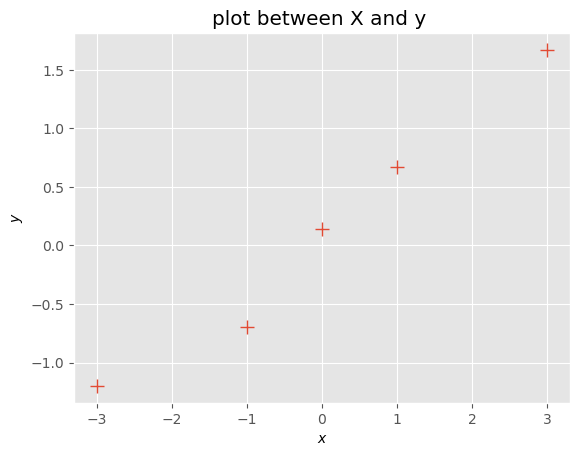

In [197]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

np.random.seed(2021)


# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set

with plt.style.context("ggplot"):    
    plt.figure()
    plt.title("plot between X and y ")
    plt.plot(X, y, '+', markersize=10)
    plt.xlabel("$x$")
    plt.ylabel("$y$");

In [198]:
## Define the MLE and prediction function  
def max_lik_estimate(X, y):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    theta_ml = np.linalg.solve(X.T @ X, X.T @ y)
    return theta_ml


def predict_with_estimate(Xtest, theta):
    
    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector
    
    prediction = Xtest @ theta 
    
    return prediction 

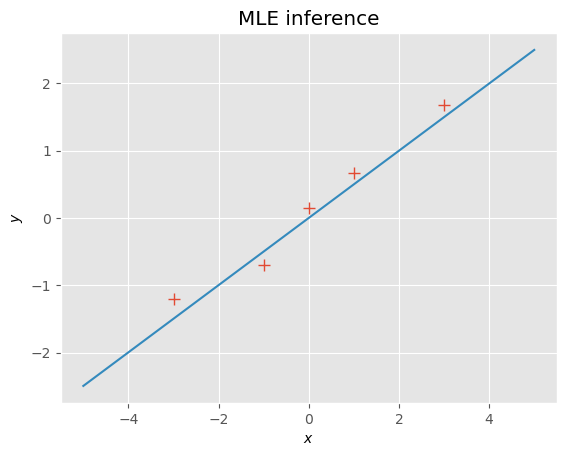

In [199]:
# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

theta_ml = max_lik_estimate(X,y)
# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest=Xtest, theta = theta_ml)

# plot
with plt.style.context("ggplot"):    
    plt.figure()
    plt.title("MLE inference")
    plt.plot(X, y, '+', markersize=8)
    plt.plot(Xtest, ml_prediction)
    plt.xlabel("$x$")
    plt.ylabel("$y$");

In [200]:
#### define a function for generated xtest sample. 
def f(x):   
    return np.cos(x) + 0.2*np.random.normal(size=(x.shape))

ytest = f(Xtest)

#### Maximum A Posteriori Estimation (MAPE):

One of the major problem is prone to overfitting. To address this problem we have to place prior distribution $p(\theta)$ on the parameters. The prior distribution explicitly encodes what parameter values plausible (before having seen any data). For example, a Gaussian prior $p(\theta) = N(0,1)$  on a single parameter $\theta$ encodes that parameter values are expected lie in the interval $[−2, 2]$ (two standard deviations around the mean value). 

With our training datasets $X$ and $y$ available, we seek to maximize the likelihood of the posterior distribution $p(\theta| X,y)$. This process is called maximum aposterior estimation. 
The posterior over the parameters $\theta$, giving the training data $X$ and $y$ is obtain by applying bayes theorem as :

\begin{eqnarray}
p(\boldsymbol\theta| X,  y) = \frac{\overbrace{p( y| X, \boldsymbol\theta)}^{\text{likelihood}}\overbrace{p(\boldsymbol\theta)}^{\text{prior}}}{\underbrace{p(y| X)}_{\text{evidence}}}
\end{eqnarray}

Since the posterior explicitly depends on the parameter prior $p(\theta)$, the prior will have an effect on the parameter vector we find as maximizer of the posterior. 

To find the MAP estimate, we follow the similar procedure as MLE. We start by log-transform and compute the log-posterior as 

$$
\log p(\theta| X,y) = \log p(y|X;\theta) + \log p(\theta) + const
$$

The constant terms is independent of $\theta$. To find the MAP estimate $\theta_{MAP}$, we minimize the negative log-posterior distribution with respect to $\theta$. We want to solve:

\begin{eqnarray}
\theta_{MAP} \in \arg \min_{\theta} \left\{-\log p(y|X;\theta) - \log p(\theta)\right\}
\end{eqnarray}

The gradient of the negative log-posterior with respect to $\theta$ is 

\begin{eqnarray}
-\dfrac{d \log p(\theta | X; y)}{d\theta} = -\dfrac{d \log p(y | X; \theta)}{d\theta} - \dfrac{d \log p(\theta}{d\theta}
\end{eqnarray}

With a conjugate gaussian prior $p(\theta) = N(0,\alpha^{2}\mathcal I)$ on the parameters $\theta$. We obtain the negative log posterior:

\begin{eqnarray}
-\log p(\theta | X,y) = \dfrac{1}{2\sigma^{2}I} \left(y - X\theta\right)^{T}\left(y - X\theta\right)  + \dfrac{1}{2\alpha^{2}}\theta^{T}\theta + const
\end{eqnarray}

Here the first term corresponds to the contribution from the log-likelihood and the second term originates from the log-prior. We find the gradient of the log-posterior with respect to the parameter $\theta$ and set to zero and we obtain : 

\begin{eqnarray}
\theta_{MAP} = \left(X^{T}X + \dfrac{\sigma^{2}}{\alpha^{2}} \mathcal I \right)^{-1} X^{T}y 
\end{eqnarray}

We realized that the only difference between the two estimate is the additional term $\dfrac{\sigma^{2}}{\alpha^{2}}$ in the inverse matrix. This term ensure that $X^{T}X + \dfrac{\sigma^{2}}{\alpha^{2}} \mathcal I$ is symmetric and strictly postive definite ( it inverse exists and the estimate is the unique solution of a system of linear equations). Moreover, it reflects the impact of the regularizer. 

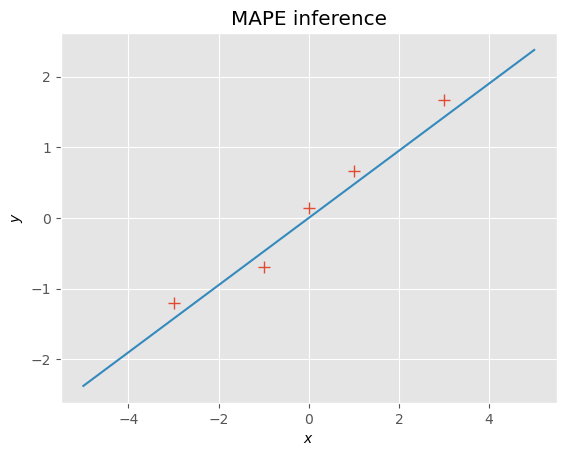

In [233]:
## define the map estimate function 
def map_estimate(X, y, sigma, alpha):
    # Phi: training inputs, Size of N x D
    # y: training targets, Size of D x 1
    # sigma: standard deviation of the noise 
    # alpha: standard deviation of the prior on the parameters
    # returns: MAP estimate theta_map, Size of D x 1
    
    D = X.shape[1] 
    
    # SOLUTION
    XX = X.T @ X + (sigma/alpha)**2 * np.eye(D)
    theta_map = np.linalg.solve(XX, X.T @ y)
    
    return theta_map

# assign the standard deviation for both noise and 
sigma = 1.0 # noise standard deviation play with this values 
alpha = 1.0 # standard deviation of the parameter prior
theta_map = map_estimate(X, y, sigma, alpha)
# predict the function values at the test points using the maximum likelihood estimator
map_prediction =  predict_with_estimate(Xtest=Xtest, theta=theta_map) #Xtest @ theta_map 

# plot
with plt.style.context("ggplot"):    
    plt.figure()
    plt.title("MAPE inference")
    plt.plot(X, y, '+', markersize=8)
    plt.plot(Xtest, map_prediction)
    plt.xlabel("$x$")
    plt.ylabel("$y$");

In [230]:
print(f"Weight for MLE:{theta_ml[0][0]}: Weight for MAPE: {theta_map[0][0]}")

Weight for MLE:0.49899999999999994: Weight for MAPE: 0.4752380952380952


##### Metric Evaluation: 

- Assess the performance of the model using Relative mean-squared error. 
$$
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N(y_n - y_n^\text{pred})^2}
$$

In [231]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2)) ## SOLUTION
    return rmse

print("*" * 10)

print(f"RMSE value for MLE {RMSE(ytest,ml_prediction)}")
print()
print(f"RMSE value for MAPE {RMSE(ytest,map_prediction)}")

**********
RMSE value for MLE 1.6069703463391125

RMSE value for MAPE 1.5446789533029819


##### Exercise MLE & MAPE 

- Repeat the process on real data 

In [ ]:
# ###### exercise real data in this scenario
import pandas as pd
data_train = #### <-------- load the data 
data_train = #<------ Fill this position 
X =  #<-------- extract xtrain
y =  ##### <-------------extract the ytrain 
data_test =  #<----------
Xtest = #### <------------
ytest = #### <--------------

##### Reference:

- Understanding Probability using python. [source](https://github.com/reza-bagheri/probability_distributions/blob/main/probability_distributions.ipynb)
- Mathematics for machine learning-book. [reference](https://mml-book.github.io/)
- Kaggle Datasets. [source](https://www.kaggle.com/code/ariadne/simple-one-feature-linear-regression/input)
- 3D plot [source](https://stackoverflow.com/questions/64940632/how-to-illustrate-a-3d-graph-of-gradient-descent-using-python-matplotlib)

##### More reading on the topics 
[1](https://towardsdatascience.com/understanding-probability-distributions-using-python-9eca9c1d9d38) 
[2](https://github.com/reza-bagheri/probability_distributions)
[3](https://mml-book.github.io/)
[4](https://jackmckew.dev/3d-gradient-descent-in-python.html)